In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#print(plt.style.available)
plt.style.use('seaborn-dark')

Begin by importing an unmodified .csv file from ibtracs. I've left out all dates before 1900 and a bunch of unnecessary columns. I've also given them my own names instead of using the header names.

In [2]:
storms = pd.read_csv('ibtracs_2018.csv', delimiter=',', skiprows=10786, header=None, usecols=[0,1,3,5,6,7,8,9,10,11], names=['id','year','basin','name','dt','type','lat','lon','wind','pres'], parse_dates={'date':[4]})

Let's look at a section and see what we're dealing with.

In [3]:
storms[30000:30010]

,date,id,year,basin,name,type,lat,lon,wind,pres
30000,1959-07-17 00:00:00,1959190N08145,1959,WP,BILLIE,NR,32.4,121.8,0.0,990.0
30001,1959-07-17 06:00:00,1959190N08145,1959,WP,BILLIE,NR,35.4,123.6,0.0,990.0
30002,1959-07-17 12:00:00,1959190N08145,1959,WP,BILLIE,NR,37.3,125.9,0.0,990.0
30003,1959-07-17 18:00:00,1959190N08145,1959,WP,BILLIE,ET,40.5,128.5,0.0,992.0
30004,1959-07-18 00:00:00,1959190N08145,1959,WP,BILLIE,ET,40.8,131.3,0.0,994.0
30005,1959-07-18 06:00:00,1959190N08145,1959,WP,BILLIE,ET,41.0,132.8,0.0,996.0
30006,1959-07-18 12:00:00,1959190N08145,1959,WP,BILLIE,ET,41.2,134.0,0.0,998.0
30007,1959-07-18 18:00:00,1959190N08145,1959,WP,BILLIE,ET,41.3,135.3,0.0,1000.0
30008,1959-07-19 00:00:00,1959190N08145,1959,WP,BILLIE,ET,41.5,136.6,0.0,1004.0
30009,1959-07-19 06:00:00,1959190N08145,1959,WP,BILLIE,ET,42.1,138.0,0.0,1008.0


Let's get rid of non 6-hourly times and non-tropical storms.

In [4]:
storms = storms.where(np.mod(storms.date.dt.hour,6) == 0).dropna()

In [5]:
storms = storms.where(storms.type.str.contains('TS')).dropna()

# Start the analysis.

### <b><i>How many storms are in the database?</i></b>

In [6]:
storms.id.nunique()

4735

### <b><i>How many storms are in each basin within the database?</i></b>

In [7]:
storms.id.groupby(storms.basin).nunique()

basin
 EP    1051
 NA    1405
 SA       1
 SI     595
 WP    1722
Name: id, dtype: int64

#### Something is weird with the "SA" basin. Let's just get rid of it.

In [8]:
storms = storms.where(~storms.basin.str.contains('SA'))

In [9]:
storms.dropna(inplace=True)

Let's make sure it worked...

In [10]:
storms.id.groupby(storms.basin).nunique()

basin
 EP    1051
 NA    1405
 SI     595
 WP    1722
Name: id, dtype: int64

### <b><i>How many storms per month per basin?</i></b>

In [11]:
storms.id.groupby([storms.basin, storms.date.dt.month]).nunique()

basin  date
 EP    1         2
       2         1
       3         1
       4         1
       5        38
       6       138
       7       247
       8       296
       9       285
       10      170
       11       37
       12        5
 NA    1         5
       2         1
       3         1
       4         4
       5        26
       6       101
       7       149
       8       367
       9       574
       10      312
       11       95
       12       17
 SI    1       176
       2       179
       3       113
       4        56
       5        14
       6         5
       7         2
       8         4
       9         8
       10       21
       11       44
       12      103
 WP    1        38
       2        18
       3        33
       4        53
       5        84
       6       131
       7       288
       8       430
       9       398
       10      299
       11      182
       12       92
Name: id, dtype: int64

### Let's put that into graph form, first we'll select just the North Atlantic storms. Then we'll do similar things to make plots for different basins.

In [12]:
storms[storms.basin.str.contains('NA')].id.groupby(storms.date.dt.month).nunique()

date
1       5
2       1
3       1
4       4
5      26
6     101
7     149
8     367
9     574
10    312
11     95
12     17
Name: id, dtype: int64

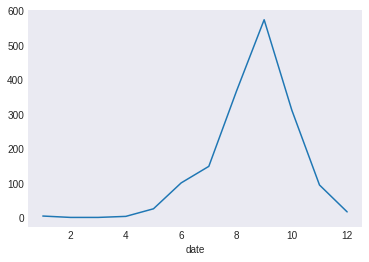

In [13]:
storms[storms.basin.str.contains('NA')].id.groupby(storms.date.dt.month).nunique().plot()

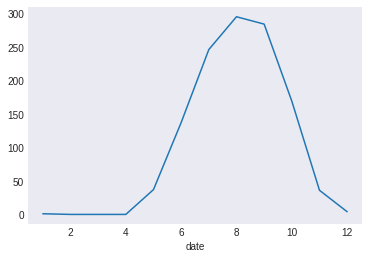

In [14]:
storms[storms.basin.str.contains('EP')].id.groupby(storms.date.dt.month).nunique().plot()

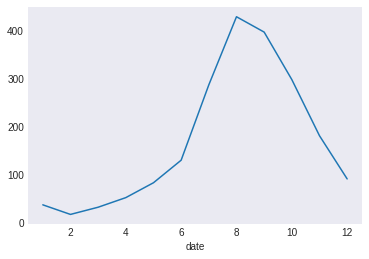

In [15]:
storms[storms.basin.str.contains('WP')].id.groupby(storms.date.dt.month).nunique().plot()

### That was fun. Let's make a new dataframe that just holds North Atlantic storms so that we can make our lives easier going forward.

In [16]:
stormsNA = storms[storms.basin.str.contains('NA')]

In [17]:
stormsNA.head(10)

,date,id,year,basin,name,type,lat,lon,wind,pres
12,1900-08-27 00:00:00,1900239N15318,1900.0,NA,UNNAMED,TS,15.0,-42.1,35.0,0.0
13,1900-08-27 06:00:00,1900239N15318,1900.0,NA,UNNAMED,TS,15.2,-43.4,35.0,0.0
14,1900-08-27 12:00:00,1900239N15318,1900.0,NA,UNNAMED,TS,15.3,-44.7,35.0,0.0
15,1900-08-27 18:00:00,1900239N15318,1900.0,NA,UNNAMED,TS,15.4,-45.6,35.0,0.0
16,1900-08-28 00:00:00,1900239N15318,1900.0,NA,UNNAMED,TS,15.6,-46.6,35.0,0.0
17,1900-08-28 06:00:00,1900239N15318,1900.0,NA,UNNAMED,TS,15.8,-47.9,35.0,0.0
18,1900-08-28 12:00:00,1900239N15318,1900.0,NA,UNNAMED,TS,16.0,-49.1,35.0,0.0
19,1900-08-28 18:00:00,1900239N15318,1900.0,NA,UNNAMED,TS,16.1,-50.3,35.0,0.0
20,1900-08-29 00:00:00,1900239N15318,1900.0,NA,UNNAMED,TS,16.3,-51.4,35.0,0.0
21,1900-08-29 06:00:00,1900239N15318,1900.0,NA,UNNAMED,TS,16.4,-52.4,35.0,0.0


#### Some stats on September hurricanes...

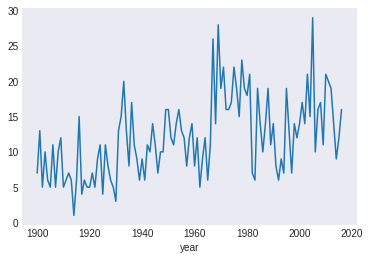

In [18]:
stormsNA.id.groupby(stormsNA.year).nunique().plot()

Highest wind reported?

In [19]:
stormsNA.loc[stormsNA.wind == stormsNA.wind.max()]

,date,id,year,basin,name,type,lat,lon,wind,pres
82824,1980-08-07 18:00:00,1980214N11330,1980.0,NA,ALLEN,TS,21.8,-86.4,165.0,899.0


Highest wind per year?

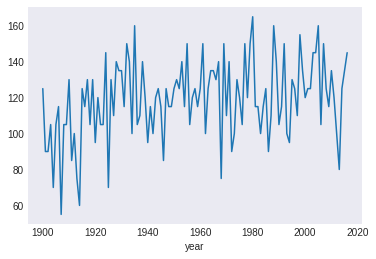

In [20]:
stormsNA.groupby(stormsNA.year).wind.max().plot()

Hell, let's just calculate ACE. ACE = 10^-4 * sum(v^2). These numbers will be a little different than other sources that use HURDAT.

In [26]:
stormsNA.wind.apply(np.square).groupby(stormsNA.year).sum()/10000

year
1900.0     86.5500
1901.0    104.0050
1902.0     34.3525
1903.0    104.7150
1904.0     32.1000
1905.0     29.6100
1906.0    164.8825
1907.0     13.3300
1908.0     97.1950
1909.0    100.5425
1910.0     66.8425
1911.0     37.2725
1912.0     59.4400
1913.0     36.9300
1914.0      2.9525
1915.0    131.3750
1916.0    149.4300
1917.0     62.6000
1918.0     40.2050
1919.0     56.3225
1920.0     32.5600
1921.0     89.8275
1922.0     57.9050
1923.0     51.2875
1924.0    103.2775
1925.0      8.0700
1926.0    234.5375
1927.0     58.1600
1928.0     84.9350
1929.0     49.5975
            ...   
1987.0     47.0825
1988.0    117.1799
1989.0    142.4075
1990.0    100.6275
1991.0     36.4275
1992.0     77.5375
1993.0     44.7175
1994.0     35.4925
1995.0    237.0875
1996.0    176.7925
1997.0     42.6050
1998.0    189.2575
1999.0    182.9700
2000.0    120.4650
2001.0    113.6300
2002.0     72.2825
2003.0    183.0575
2004.0    233.2750
2005.0    262.9475
2006.0     81.8950
2007.0     76.9100
2008.0 